<a href="https://colab.research.google.com/github/Alleny244/Image_Classifier_CipherDataset/blob/main/Cifar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



## Importing Cifar Dataset

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


## Find shape of the datasets

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## First element of the training set

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Showing the  first elment as picture

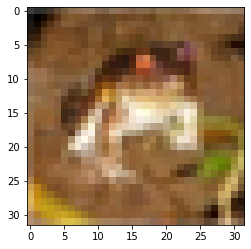

In [6]:
img=plt.imshow(x_train[0])

## Get the image label

In [7]:
print("The label of the above image is ",y_train[0])

The label of the above image is  [6]


## Assigining labels to images

In [8]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Assiging these labels to y

In [9]:
print("Displaying the corresponding labels ",y_train[0][0]," ",labels[y_train[0][0]])


Displaying the corresponding labels  6   frog


## Converting outputs into categorical

In [10]:
from tensorflow.keras.utils import to_categorical
print("Before : y_train shape is: ",y_train.shape)
y_train_hot_one =to_categorical(y_train)
print(y_train_hot_one.shape)
print("Before : y_test shape is: ",y_test.shape)
y_test_hot_one =to_categorical(y_test)
print(y_test_hot_one.shape)

Before : y_train shape is:  (50000, 1)
(50000, 10)
Before : y_test shape is:  (10000, 1)
(10000, 10)


## Demo of y_train_hot_one

In [11]:
y_train_hot_one

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Normailze input pixel between 0 and 255

In [12]:
x_train=x_train/255
x_test=x_test/255
print(x_train)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

## Creating models with keras

In [13]:
cnn=keras.Sequential([
    keras.layers.Conv2D( activation='relu',kernel_size=(3,3),input_shape=(32,32,3),filters=32),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D( activation='relu',kernel_size=(3,3),filters=32),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1500,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(750,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax'),
    #softmax
    
])

In [14]:
## Compiling the model
cnn.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
    
)

In [15]:
##Training the model
cnn.fit(x_train,y_train_hot_one,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 106s 67ms/step - loss: 1.5906 - accuracy: 0.4155
Epoch 2/15
1563/1563 [==============================] - 103s 66ms/step - loss: 1.2600 - accuracy: 0.5571
Epoch 3/15
1563/1563 [==============================] - 103s 66ms/step - loss: 1.1151 - accuracy: 0.6164
Epoch 4/15
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0157 - accuracy: 0.6500
Epoch 5/15
1563/1563 [==============================] - 101s 65ms/step - loss: 0.9365 - accuracy: 0.6799
Epoch 6/15
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8782 - accuracy: 0.6996
Epoch 7/15
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8169 - accuracy: 0.7219
Epoch 8/15
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7748 - accuracy: 0.7354
Epoch 9/15
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7183 - accuracy: 0.7556
Epoch 10/15
1563/1563 [==============================] 

In [16]:
cnn.evaluate(x_test,y_test_hot_one)

313/313 [==============================] - 5s 16ms/step - loss: 0.9725 - accuracy: 0.7023


[0.9724794030189514, 0.7023000121116638]

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=cnn.predict(x_test)
y_pred_class=[np.argmax(y) for y in y_pred]
y_pred_class
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1000
           1       0.87      0.78      0.82      1000
           2       0.67      0.54      0.60      1000
           3       0.50      0.50      0.50      1000
           4       0.57      0.69      0.63      1000
           5       0.63      0.55      0.59      1000
           6       0.77      0.81      0.79      1000
           7       0.68      0.81      0.74      1000
           8       0.82      0.77      0.80      1000
           9       0.75      0.84      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [18]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1729500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0

In [40]:
from google.colab import files
uploaded=files.upload()

Saving test.jpg to test.jpg


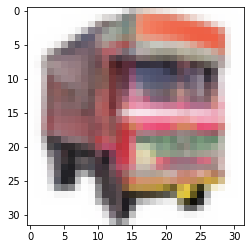

In [50]:

plt.imshow(image)

##processsing the image


In [75]:
def predict_output(x):
  image=plt.imread(x)
  from skimage.transform import resize
  resized_image=resize(image,(32,32,3))
  x_t=np.array(resized_image)
  x_t=x_t.reshape(-1,32,32,3)
  predictions=cnn.predict(x_t)#input value
  predict_class=np.argmax(predictions)
  print(labels[predict_class])
  return labels[predict_class]



In [25]:
labels[y_test[5][0]]

'frog'

## General + Image  classifcation using ANN

In [21]:
labels[y_pred_class[5]]

'frog'

In [23]:
# ##get the list of physical devices
# tensorflow.config.experimental.list_physical_devices() 

## CNN

In [71]:
x_test[5][0]

array([[0.70196078, 0.4627451 , 0.3254902 ],
       [0.54509804, 0.37647059, 0.23921569],
       [0.30196078, 0.19215686, 0.10196078],
       [0.34509804, 0.23137255, 0.14117647],
       [0.55294118, 0.37647059, 0.25490196],
       [0.61568627, 0.37254902, 0.2627451 ],
       [0.61176471, 0.32941176, 0.22745098],
       [0.59215686, 0.3254902 , 0.21176471],
       [0.61176471, 0.37254902, 0.24705882],
       [0.61960784, 0.38039216, 0.25490196],
       [0.56470588, 0.3254902 , 0.20392157],
       [0.59215686, 0.35294118, 0.23137255],
       [0.59215686, 0.36078431, 0.24313725],
       [0.53333333, 0.32156863, 0.20784314],
       [0.4745098 , 0.29411765, 0.18039216],
       [0.4627451 , 0.30980392, 0.20392157],
       [0.49411765, 0.35686275, 0.27843137],
       [0.42352941, 0.31372549, 0.25490196],
       [0.32941176, 0.23137255, 0.16862745],
       [0.32941176, 0.19607843, 0.15294118],
       [0.38431373, 0.21568627, 0.18431373],
       [0.38431373, 0.21960784, 0.18431373],
       [0.

In [65]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [67]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()  
drive = GoogleDrive(gauth)

In [74]:
cnn.save('cnn.h5')
model_file = drive.CreateFile({'title' : 'cnn.h5'}) 
model_file.SetContentFile('models.h5')                       
model_file.Upload()